# Вычисление площадей минимального и максимального треугольника (квадрата) на множестве точек плоскости #
-------------------------------------------------------------------------------------------------

Импортируем необходимые библиотеки для проекта

In [1]:
from random import randrange
from typing import List
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

Создадим класс Point, имеющий атрибуты X и Y - это будут координаты созданной точки

In [2]:
class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

#### Функция для генерации точек на плоскости

Функция принимает три параметра:

    * count: Количество точек на плоскости

    * Параметры of и to задают диапазон по X и Y

Алгоритм функции:
    1. Создаётся массив для хранения точек
    2. Запускается цикл, который остановиться после создания заданного количества точек
    3. Внутри цикла в массив, при помощи функции append(), добавляется точка с рандомными координатами
    
Функция возвращает массив с точками

In [3]:
def generate_point(count: int, of: int, to: int) -> List[Point]:
    points: List[Point] = []
    for i in range(count):
        points.append(Point(randrange(of, to), randrange(of, to)))
    return points

#### Добавим немного интерактива в наш проект
Следующий код добавляет ползунки, при помощи которых можно выбрать количество точек и диапозон, отобразим их позже

In [4]:
from ipywidgets import IntSlider

slider_points = IntSlider(
    value=100, # Первоначальное значение
    min=0,     # Минимум
    max=500,  # Максимум
    step=1,  # Шаг изменения
    description='Points:',
    continuous_update=False,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

slider_of = IntSlider(
    value=-100, # Первоначальное значение
    min=-500,     # Минимум
    max=0,  # Максимум
    step=1,  # Шаг изменения
    description='Of:',
    continuous_update=False,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

slider_to = IntSlider(
    value=100, # Первоначальное значение
    min=0,     # Минимум
    max=500,  # Максимум
    step=1,  # Шаг изменения
    description='To:',
    continuous_update=False,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

## Теория

### Как найти площадь треугольника (квадрата) по координатам его вершин?

**Будем выводить формулу**

Для вывода формулы площади многоугольника нам понадобятся сведения из вычислительной геометрии, а именно, понятие ориентированной площади треугольника.

Ориентированная площадь треугольника – это обычная площадь, снабженная знаком. Знак ориентированной площади треугольника АВС такой же, как у ориентированного угла между векторами AB и AC. То есть ее знак зависит от порядка перечисления вершин.

![Визуализация векторов](image/2.png)

На рис.1 треугольник АВС – прямоугольный. Его ориентированная площадь равна ![Визуализация векторов](image/3.gif)
(она больше нуля, так как пара OB, OC. Площадь многоугольника ориентирована положительно).  Эту же величину можно вычислить другим способом.

Пусть О – произвольная точка плоскости. На рисунке площадь треугольника ABC получится, если из площади треугольника OBC вычесть площади OAB и OCA. Таким образом, нужно просто сложить ориентированные площади треугольников OAB, OBC и OCA. Это правило работает при любом выборе точки О.

Точно так же для вычисления площади любого многоугольника ![Точки](image/4.gif)
нужно сложить ориентированные площади треугольников ![Точки](image/5.gif)
![Точки](image/3.png)

В сумме получится площадь многоугольника, взятая со знаком плюс, если при обходе ломаной ![Точки](image/4.gif)
многоугольника находится слева (обход границы против часовой стрелки), и со знаком минус, если он находится справа (обход по часовой стрелке).

Итак, вычисление площади многоугольника свелось к нахождению площади треугольника. Посмотрим, как выразить ее в координатах.

Векторное произведение двух векторов на плоскости есть площадь параллелограмма, построенного на этих векторах.

![Точки](image/4.png)

Векторное произведение, выраженное через координаты векторов:

![Точки](image/6.gif)

Площадь треугольника будет равна половине этой площади:

![Точки](image/7.gif)

В качестве точки О удобно взять начало координат, тогда координаты векторов, на основании которых вычисляются ориентированные площади, совпадут с координатами точек.

Пусть (х1, y1), (x2, у2), …, (хN,уN) —координаты вершин заданного многоугольника в порядке обхода по или против часовой стрелки. Тогда его ориентированная площадь S будет равна:

![Точки](image/5.png)

Это и есть наша рабочая формула, она используется в нашей программе

---

Напишем функцию, которая нам пригодится и для треугольника и для квадрата

#### Функция для нахождения координат вектора

Функция принимает два параметра:

    * point_start: Начало вектора

    * point_end: Конец вектора

Для нахождения координат вектора, необходимо из координат конца вектора вычесть начальные координаты

Функция возвращает координаты вектора

In [5]:
def vector_coordinates(point_start: Point, point_end: Point):
    return point_end.x - point_start.x, point_end.y - point_start.y

## Итак, начнём с треугольника
------------------------

#### Функция для нахождения площади

В параметрах передаются массивы, содержащие 2 элемента: X, Y

Для нахождения площади воспользуемся найденной формулой

Функция возвращает площадь треугольника

In [6]:
def area_triangle(vector_a: tuple[float, float], vector_b: tuple[float, float]):
    return abs(vector_a[0] * vector_b[1] - vector_a[1] * vector_b[0]) / 2

#### Основная функция для нахождения максимальной и минимальной площади треугольника, которая также вернёт координаты найденных треугольников с максимальной и минимальной площадью

Перед тем как перейти к написанию алгоритма, необходимо разобраться, что он будет делать.

Идея следующая: взять 3 точки из списка, найти векторы и расчитать площадь по формуле.

Для взятия 3-х точек из списка воспользуемся циклами. Но у нас возникнет следующая проблема.

#### Проблема

Если использовать наивный перебор точек, может возникнуть ситуация когда для нескольких точек - площадь будет считаться по несколько раз, что серьёзно замедлит исполнение кода.

#### Анализ

У нас есть список, состоящий из 6 точек:
    
```points = [1, 2, 3, 4, 5, 6]```
    
Воспользуемся наивным перебором:

```
variations = []
count = 0

for i in range(len(points)):
    for j in range(len(points)):
        for k in range(len(points)):
            box = [points[i], points[j], points[k]]"
            variations += box
            count += 1
```

Получаем следующие комбинации точек:

[1, 1, 1][1, 1, 2][1, 1, 3][1, 1, 4][1, 1, 5][1, 1, 6]  
[1, 2, 1][1, 2, 2][1, 2, 3][1, 2, 4][1, 2, 5][1, 2, 6]  
[1, 3, 1][1, 3, 2][1, 3, 3][1, 3, 4][1, 3, 5][1, 3, 6]  
[1, 4, 1][1, 4, 2][1, 4, 3][1, 4, 4][1, 4, 5][1, 4, 6]  
[1, 5, 1][1, 5, 2][1, 5, 3][1, 5, 4][1, 5, 5][1, 5, 6]  
[1, 6, 1][1, 6, 2][1, 6, 3][1, 6, 4][1, 6, 5][1, 6, 6]  
[2, 1, 1][2, 1, 2][2, 1, 3][2, 1, 4][2, 1, 5][2, 1, 6]  
[2, 2, 1][2, 2, 2][2, 2, 3][2, 2, 4][2, 2, 5][2, 2, 6]  
[2, 3, 1][2, 3, 2][2, 3, 3][2, 3, 4][2, 3, 5][2, 3, 6]  
[2, 4, 1][2, 4, 2][2, 4, 3][2, 4, 4][2, 4, 5][2, 4, 6]  
[2, 5, 1][2, 5, 2][2, 5, 3][2, 5, 4][2, 5, 5][2, 5, 6]  
[2, 6, 1][2, 6, 2][2, 6, 3][2, 6, 4][2, 6, 5][2, 6, 6]  
[3, 1, 1][3, 1, 2][3, 1, 3][3, 1, 4][3, 1, 5][3, 1, 6]  
[3, 2, 1][3, 2, 2][3, 2, 3][3, 2, 4][3, 2, 5][3, 2, 6]  
[3, 3, 1][3, 3, 2][3, 3, 3][3, 3, 4][3, 3, 5][3, 3, 6]  
[3, 4, 1][3, 4, 2][3, 4, 3][3, 4, 4][3, 4, 5][3, 4, 6]  
[3, 5, 1][3, 5, 2][3, 5, 3][3, 5, 4][3, 5, 5][3, 5, 6]  
[3, 6, 1][3, 6, 2][3, 6, 3][3, 6, 4][3, 6, 5][3, 6, 6]  
[4, 1, 1][4, 1, 2][4, 1, 3][4, 1, 4][4, 1, 5][4, 1, 6]  
[4, 2, 1][4, 2, 2][4, 2, 3][4, 2, 4][4, 2, 5][4, 2, 6]  
[4, 3, 1][4, 3, 2][4, 3, 3][4, 3, 4][4, 3, 5][4, 3, 6]  
[4, 4, 1][4, 4, 2][4, 4, 3][4, 4, 4][4, 4, 5][4, 4, 6]  
[4, 5, 1][4, 5, 2][4, 5, 3][4, 5, 4][4, 5, 5][4, 5, 6]  
[4, 6, 1][4, 6, 2][4, 6, 3][4, 6, 4][4, 6, 5][4, 6, 6]  
[5, 1, 1][5, 1, 2][5, 1, 3][5, 1, 4][5, 1, 5][5, 1, 6]  
[5, 2, 1][5, 2, 2][5, 2, 3][5, 2, 4][5, 2, 5][5, 2, 6]  
[5, 3, 1][5, 3, 2][5, 3, 3][5, 3, 4][5, 3, 5][5, 3, 6]  
[5, 4, 1][5, 4, 2][5, 4, 3][5, 4, 4][5, 4, 5][5, 4, 6]  
[5, 5, 1][5, 5, 2][5, 5, 3][5, 5, 4][5, 5, 5][5, 5, 6]  
[5, 6, 1][5, 6, 2][5, 6, 3][5, 6, 4][5, 6, 5][5, 6, 6]  
[6, 1, 1][6, 1, 2][6, 1, 3][6, 1, 4][6, 1, 5][6, 1, 6]  
[6, 2, 1][6, 2, 2][6, 2, 3][6, 2, 4][6, 2, 5][6, 2, 6]  
[6, 3, 1][6, 3, 2][6, 3, 3][6, 3, 4][6, 3, 5][6, 3, 6]  
[6, 4, 1][6, 4, 2][6, 4, 3][6, 4, 4][6, 4, 5][6, 4, 6]  
[6, 5, 1][6, 5, 2][6, 5, 3][6, 5, 4][6, 5, 5][6, 5, 6]  
[6, 6, 1][6, 6, 2][6, 6, 3][6, 6, 4][6, 6, 5][6, 6, 6]  

Легко заметить, что у нас есть повторяющиеся комбинации точек в разной последовательности. Напиример:  
[1, 2, 3] -- [3, 2, 1] -- [2, 3, 1] и подобные. Т.е. для точек придется проводить расчёты 3 раза, что серьёзно замедлит алгоритм.

Ах да, количество пройденных итераций: 216

Проблема ясна, перейдём к решению.

Для начало найдём уникальные комбинации точек. Для этого напишем следующий код:

```
variations = []
count = 0

for i in range(len(points)):
    for j in range(len(points)):
        for k in range(len(points)):
            box = [points[i], points[j], points[k]]
            box.sort()
            if box not in variations:
                variations.append(box)
                count += 1
```
Количество итераций: 56 - не плохо

Получаем следующие комбинации:

[1, 1, 1][1, 1, 2][1, 1, 3][1, 1, 4][1, 1, 5][1, 1, 6]  
[1, 2, 2][1, 2, 3][1, 2, 4][1, 2, 5][1, 2, 6]  
[1, 3, 3][1, 3, 4][1, 3, 5][1, 3, 6]  
[1, 4, 4][1, 4, 5][1, 4, 6]  
[1, 5, 5][1, 5, 6]  
[1, 6, 6]  
  
[2, 2, 2][2, 2, 3][2, 2, 4][2, 2, 5][2, 2, 6]  
[2, 3, 3][2, 3, 4][2, 3, 5][2, 3, 6]  
[2, 4, 4][2, 4, 5][2, 4, 6]  
[2, 5, 5][2, 5, 6]  
[2, 6, 6]  

[3, 3, 3][3, 3, 4][3, 3, 5][3, 3, 6]  
[3, 4, 4][3, 4, 5][3, 4, 6]  
[3, 5, 5][3, 5, 6]  
[3, 6, 6]  

[4, 4, 4][4, 4, 5][4, 4, 6]  
[4, 5, 5][4, 5, 6]  
[4, 6, 6]  

[5, 5, 5][5, 5, 6]  
[5, 6, 6]  

[6, 6, 6]  

Осталось только увидеть закономерность и да, она есть.

Взглянем на выходные данные и заметим, что первая цифра (именно цифра, мы пытаемся увидеть закономерность, асбтрагируемся) начинается с 1 до 6

![1 прослеживание закономерности](image/logic_1.png)

Вторая цифра начинается со значения предыдущей и заканчивается на 6

![2 прослеживание закономерности](image/logic_2.png)

Третья же цифра начинается со значения 2 цифры.

![3 прослеживание закономерности](image/logic_3.png)

Вот и вся закономерность, осталось реализовать её в коде.

#### Реализация

Собственно код:

```
variations = []
count = 0

for i in range(len(points)):
    for j in range(i, len(points)):
        for k in range(j, len(points)):
            box = [points[i], points[j], points[k]]
            variations.append(box)
            count += 1
```

Получаем следующие комбинации:

[1, 1, 1][1, 1, 2][1, 1, 3][1, 1, 4][1, 1, 5][1, 1, 6]  
[1, 2, 2][1, 2, 3][1, 2, 4][1, 2, 5][1, 2, 6]  
[1, 3, 3][1, 3, 4][1, 3, 5][1, 3, 6]  
[1, 4, 4][1, 4, 5][1, 4, 6]  
[1, 5, 5][1, 5, 6]  
[1, 6, 6]  
[2, 2, 2][2, 2, 3][2, 2, 4][2, 2, 5][2, 2, 6]  
[2, 3, 3][2, 3, 4][2, 3, 5][2, 3, 6]  
[2, 4, 4][2, 4, 5][2, 4, 6]  
[2, 5, 5][2, 5, 6]  
[2, 6, 6]  
[3, 3, 3][3, 3, 4][3, 3, 5][3, 3, 6]  
[3, 4, 4][3, 4, 5][3, 4, 6]  
[3, 5, 5][3, 5, 6]  
[3, 6, 6]  
[4, 4, 4][4, 4, 5][4, 4, 6]  
[4, 5, 5][4, 5, 6]  
[4, 6, 6]  
[5, 5, 5][5, 5, 6]  
[5, 6, 6]  
[6, 6, 6]  

Количество итераций: 56

---
Перейдём к написанию кода.

In [7]:
def triangle(points: List[Point]) -> tuple[int, tuple[int, int, int], int, tuple[int, int, int]]:
    eps = 1e-10
    min_area = 0
    max_area = 0
    index_points_min_area = ()
    index_points_max_area = ()

    for a in range(len(points)):
        for b in range(a, len(points)):
            vector_a = vector_coordinates(points[a], points[b])
            for c in range(b, len(points)):
                vector_b = vector_coordinates(points[b], points[c])
                area = area_triangle(vector_a, vector_b)

                if area > max_area:
                    max_area = area
                    index_points_max_area = (a, b, c)

                if area > eps and (min_area - area > eps or min_area < eps):
                    min_area = area
                    index_points_min_area = (a, b, c)

    return min_area, index_points_min_area, max_area, index_points_max_area

### Демонстрация работы алгоритма

При помощи функции display() из библиотеке IPython отобразим ползунки, которые зададут количество точек и диапазон

In [8]:
display(slider_points)
display(slider_of)
display(slider_to)

IntSlider(value=100, continuous_update=False, description='Points:', max=500)

IntSlider(value=-100, continuous_update=False, description='Of:', max=0, min=-500)

IntSlider(value=100, continuous_update=False, description='To:', max=500)

Создадим точки на плоскости, при помощи функции для генерации точек, в параметры которой передадим значения ползунков

In [9]:
points = generate_point(count=300, of=-10, to=10)

Воспользуемся функцией для нахождения площади треугольника

In [10]:
min_area, index_points_min_area, max_area, index_points_max_area = triangle(points)

#### Площадь наименьшего треугольника равна и его координаты:

In [11]:
min_area

0.5

In [12]:
print(f"{points[index_points_min_area[0]].x, points[index_points_min_area[0]].y}\n"
      f"{points[index_points_min_area[1]].x, points[index_points_min_area[1]].y}\n"
      f"{points[index_points_min_area[2]].x, points[index_points_min_area[2]].y}")

(-9, -3)
(2, 6)
(-3, 2)


#### Площадь наибольшего треугольника равна и его координаты:

In [13]:
max_area

170.0

In [14]:
print(f"{points[index_points_max_area[0]].x, points[index_points_max_area[0]].y}\n"
      f"{points[index_points_max_area[1]].x, points[index_points_max_area[1]].y}\n"
      f"{points[index_points_max_area[2]].x, points[index_points_max_area[2]].y}")

(-10, 8)
(-8, -10)
(9, 7)


#### Запишем координаты по X и Y в отдельные переменные, чтобы вывести графики

In [15]:
coords_x_min = [points[index_points_min_area[i]].x for i in range(3)]
coords_y_min = [points[index_points_min_area[i]].y for i in range(3)]
coords_x_min.append(points[index_points_min_area[0]].x)
coords_y_min.append(points[index_points_min_area[0]].y)

coords_x_max = [points[index_points_max_area[i]].x for i in range(3)]
coords_y_max = [points[index_points_max_area[i]].y for i in range(3)]
coords_x_max.append(points[index_points_max_area[0]].x)
coords_y_max.append(points[index_points_max_area[0]].y)

#### Выведем графики с использованием записанных ранее координат

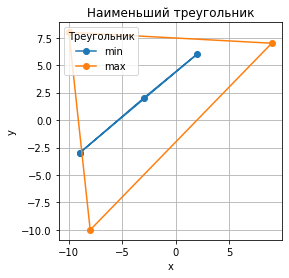

In [16]:
# Построение графика
plt.figure(figsize=(4,4))
plt.title("Наименьший треугольник") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(coords_x_min, coords_y_min, coords_x_max, coords_y_max, marker="o")  # построение графика
plt.legend(['min', 'max'], loc=2, title='Треугольник') # Добавление легенды

## С треугольником разобрались, теперь приступим к квадрату
----------------------------------

#### Функция для вычисление векторного произведения

Функция принимает в параметрах два вектора

Возвращает векторное произведение

In [17]:
def composition_vector(point_a: Point, point_b: Point):
    return point_a.x * point_b.y - point_a.y * point_b.x

#### Функция для вычисления площади квадрата

In [18]:
def area_square(point_a: Point, point_b: Point, point_c: Point, point_d: Point):
    return sum((composition_vector(point_a, point_b),
                composition_vector(point_b, point_c),
                composition_vector(point_c, point_d),
                composition_vector(point_d, point_a))) / 2

#### Основная функция для нахождения максимальной и минимальной площадей квадратов, которая также вернёт координаты найденных квадратов с максимальной и минимальной площадью

Перед тем как перейти к написанию алгоритма, необходимо разобраться, что он будет делать.

Идея, по сути такая же как и у треугольника: взять 4 точки из списка, найти векторы и расчитать площадь по формуле.

Для взятия 4-х точек из списка воспользуемся циклами. Алгоритм по которому будет перебираться список нам известен.

#### Проблема

Но как же определять, что 4 точки образуют квадрат? 

#### Решение

В интернете удалось найти следующие формулы

![Формулы для определения координат квадрата по двум известным](image/coordinates_square.JPG)

Сначала нам необходимо найти координаты середины между точек A и C, что позволит найти точки B и D.

Давайте попробуем отразить это в коде.

In [19]:
def square(points):
    eps = 1e-10
    min_area = 0
    max_area = 0
    index_points_min_area = ()
    index_points_max_area = ()

    for a in range(len(points)):
        for b in range(a, len(points)):
            for c in range(b, len(points)):
                x_m = (points[a].x + points[c].x) / 2
                y_m = (points[a].y + points[c].y) / 2
                x_b = x_m + y_m - points[a].y
                y_b = y_m - x_m + points[a].x
                if points[b].x == x_b and points[b].y == y_b:
                    for d in range(c, len(points)):
                        x_d = x_m - y_m + points[a].y
                        y_d = y_m + x_m - points[a].x
                        if points[d].x == x_d and points[d].y == y_d:
                            # Находим площадь
                            area = area_square(points[a], points[b], points[c], points[d])
                            # Сравниваем с максимальной
                            if area > max_area:
                                max_area = area
                                index_points_max_area = (a, b, c, d)
                            # min_area < eps --> Условие задаёт первое значение отличное от 0
                            # area > eps --> Условие чтобы min_area не обратилось в 0
                            # min_area - area > eps --> Условие отбора минимальной площади
                            if area > eps and (min_area - area > eps or min_area < eps):
                                min_area = area
                                index_points_min_area = (a, b, c, d)

    return min_area, index_points_min_area, max_area, index_points_max_area

### Демонстрация работы алгоритма

Воспользуемся функцией для нахождения максимальной и минимальной площадей квадрата

In [20]:
min_area, coords_min_area, max_area, coords_max_area = square(points)

In [21]:
if min_area == 0 and max_area == 0:
    print("Квадрат не найден")
else:
    print(f"Площадь наибольшего квадрата равна: {max_area}")
    print(f"Его координаты:"
          f" {points[coords_max_area[0]].x, points[coords_max_area[0]].y},"
          f" {points[coords_max_area[1]].x, points[coords_max_area[1]].y},"
          f" {points[coords_max_area[2]].x, points[coords_max_area[2]].y},"
          f" {points[coords_max_area[3]].x, points[coords_max_area[3]].y}")
    print(f"Площадь наименьшего квадрата равна: {min_area}")
    print(f"Его координаты:"
          f" {points[coords_min_area[0]].x, points[coords_min_area[0]].y},"
          f" {points[coords_min_area[1]].x, points[coords_min_area[1]].y},"
          f" {points[coords_min_area[2]].x, points[coords_min_area[2]].y},"
          f" {points[coords_min_area[3]].x, points[coords_min_area[3]].y}")
    
    # Запишем координаты по X и Y в отдельные переменные, чтобы вывести графики
    coords_x_min = [points[coords_min_area[i]].x for i in range(4)]
    coords_y_min = [points[coords_min_area[i]].y for i in range(4)]
    coords_x_min.append(points[coords_min_area[0]].x)
    coords_y_min.append(points[coords_min_area[0]].y)
    
    coords_x_max = [points[coords_max_area[i]].x for i in range(4)]
    coords_y_max = [points[coords_max_area[i]].y for i in range(4)]
    coords_x_max.append(points[coords_max_area[0]].x)
    coords_y_max.append(points[coords_max_area[0]].y)

Площадь наибольшего квадрата равна: 260.0
Его координаты: (6, -9), (8, 7), (-8, 9), (-10, -7)
Площадь наименьшего квадрата равна: 1.0
Его координаты: (2, 6), (1, 6), (1, 5), (2, 5)


#### Выведем графики с использованием записанных ранее координат

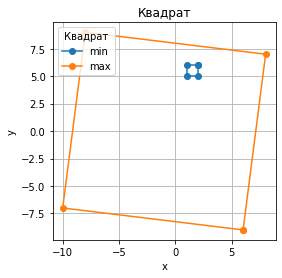

In [22]:
# Построение графика
plt.figure(figsize=(4,4))
plt.title("Квадрат") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(coords_x_min, coords_y_min, coords_x_max, coords_y_max, marker="o")  # построение графика
plt.legend(['min', 'max'], loc=2, title='Квадрат')